In [0]:
import pyspark
from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()

spark

SparkSession - hive 
 
 
 SparkContext 

 Spark UI 

 
 Version 
 v3.3.0 
 Master 
 local[8] 
 AppName 
 Databricks Shell

In [0]:
df1 = spark.read.load("/FileStore/tables/CompleteDataset.csv", format="csv", inferSchema="true", header="true")

In [0]:
df1.show()

+---+-----------------+---+--------------------+-----------+--------------------+-------+---------+-------------------+--------------------+------+-----+-------+------------+----------+-------+-------+------------+---------+--------+-----+---------+---------+------------------+---------+-----------+----------+--------------+-----------+----------------+-------------+-------+------------+----------+-------+---------+-----------+---------+-------------+----------+--------------+------------+-------+---------------+--------+------+-------+----+----+----+----+----+------+----+----+----+----+----+----+----+----+----+----+-------------------+----+----+----+----+----+----+----+----+----+----+----+
|_c0|             Name|Age|               Photo|Nationality|                Flag|Overall|Potential|               Club|           Club Logo| Value| Wage|Special|Acceleration|Aggression|Agility|Balance|Ball control|Composure|Crossing|Curve|Dribbling|Finishing|Free kick accuracy|GK diving|GK handling|

In [0]:
# number of partitions in DF
df1.rdd.getNumPartitions()

Out[9]: 2

In [0]:
# increase or decrease the number of partitions in DF
df2 = df1.repartition(4)
df2.rdd.getNumPartitions()

Out[10]: 4

In [0]:
# rename columns and clean null values
df2.withColumnRenamed("_c0", "ID")\
    .withColumnRenamed("Ball control", "Ball_Control")\
    .withColumnRenamed("Sliding tackle","Sliding_tackle")

df2.na.fill({"RAM": 10}).show()

+----+---------------+---+--------------------+-----------+--------------------+-------+---------+--------------------+--------------------+------+-----+-------+------------+----------+-------+-------+------------+---------+--------+-----+---------+---------+------------------+---------+-----------+----------+--------------+-----------+----------------+-------------+-------+------------+----------+-------+---------+-----------+---------+-------------+----------+--------------+------------+-------+---------------+--------+------+-------+----+----+----+----+----+------+----+----+----+----+----+----+----+----+----+----+-------------------+----+----+----+----+----+----+----+----+----+----+----+
| _c0|           Name|Age|               Photo|Nationality|                Flag|Overall|Potential|                Club|           Club Logo| Value| Wage|Special|Acceleration|Aggression|Agility|Balance|Ball control|Composure|Crossing|Curve|Dribbling|Finishing|Free kick accuracy|GK diving|GK handling|

In [0]:
# transformation (select):
df2.select("Name","Overall").distinct().show()

+--------------+-------+
|          Name|Overall|
+--------------+-------+
|  J. Reimerink|     66|
|  Jorge Molina|     73|
|  V. Kostevych|     70|
|    L. Kurzawa|     80|
|       A. Özek|     71|
|      J. Salas|     67|
|      S. Byram|     73|
|    I. Lendrić|     67|
|  Omar Perdomo|     70|
| L. Martinelli|     66|
|  Lee Seung Gi|     67|
|   E. Albayrak|     74|
|      J. Muñoz|     70|
|       D. Vera|     74|
|Angel Martínez|     70|
|       Canella|     70|
|      R. Kruse|     72|
|     M. Appiah|     66|
|     T. Zengin|     73|
|  G. Rodríguez|     69|
+--------------+-------+
only showing top 20 rows



In [0]:
# Transfoemation (filter):
df2.filter(df2["Overall"] > 70).show()

+----+---------------+---+--------------------+-------------------+--------------------+-------+---------+--------------------+--------------------+------+-----+-------+------------+----------+-------+-------+------------+---------+--------+-----+---------+---------+------------------+---------+-----------+----------+--------------+-----------+----------------+-------------+-------+------------+----------+-------+---------+-----------+---------+-------------+----------+--------------+------------+-------+---------------+--------+------+-------+----+----+----+----+----+------+----+----+----+----+----+----+----+----+----+----+-------------------+----+----+----+----+----+----+----+----+----+----+----+
| _c0|           Name|Age|               Photo|        Nationality|                Flag|Overall|Potential|                Club|           Club Logo| Value| Wage|Special|Acceleration|Aggression|Agility|Balance|Ball control|Composure|Crossing|Curve|Dribbling|Finishing|Free kick accuracy|GK div

In [0]:
df2.select("Name").filter(df2["Overall"] > 70).show()

+--------------+
|          Name|
+--------------+
|  J. Velázquez|
|    M. Yoshida|
|     F. Andone|
|       Iraizoz|
|    S. Ghoddos|
|      B. McKay|
|  M. Kosanović|
|     K. Zohore|
|  A. Thomasson|
|       Luciano|
|  Suk Hyun Jun|
|Álex Fernández|
|      D. Chará|
|       William|
|    F. Lucioni|
|     T. Kupisz|
|   C. Sheridan|
|       Marcano|
|      U. Ćosić|
|     Claudemir|
+--------------+
only showing top 20 rows



In [0]:
# club wise count of England players who are older than 25
df2.where((df2["Age"]>25) & (df2["Nationality"] == "England" )).groupBy("Club").count().sort("count", ascending=False).show()

+-------------------+-----+
|               Club|count|
+-------------------+-----+
|   Bolton Wanderers|   14|
|       Notts County|   13|
|      Burton Albion|   13|
|     Newport County|   10|
|          Port Vale|   10|
|      AFC Wimbledon|    9|
|     Mansfield Town|    9|
|       Grimsby Town|    9|
|        Bournemouth|    9|
|    Carlisle United|    9|
|       Crawley Town|    9|
|    Southend United|    9|
|             Barnet|    8|
|       Cardiff City|    8|
|   Sheffield United|    8|
|    Birmingham City|    8|
|     Bristol Rovers|    8|
|Sheffield Wednesday|    8|
|       Derby County|    8|
|      Oxford United|    8|
+-------------------+-----+
only showing top 20 rows



Out[31]: <AxesSubplot:xlabel='Nationality'>

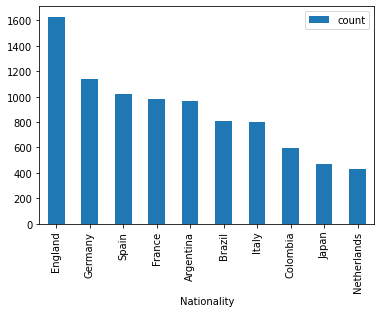

In [0]:
# visualization
# Top 10 countries by number of players

df_result = df2.groupBy("Nationality").count().sort("count", ascending=False)
pandas_df = df_result.limit(10).toPandas()

pandas_df.plot(x = "Nationality", y = "count", kind = "bar")

In [0]:
# Spark sql (register the DF using a local temporary view)

df2.createOrReplaceTempView("df_football")

In [0]:
# Sql query : Top 10 players with respect to wages

sql_query = """SELECT Name, Wage, Value, Club, Nationality 
                FROM df_football 
                ORDER BY CAST(substr(Wage, 2, length(Wage) - 2) as INT) DESC 
                LIMIT 10"""
result = spark.sql(sql_query)
result.show()

+-----------------+-----+------+----------------+-----------+
|             Name| Wage| Value|            Club|Nationality|
+-----------------+-----+------+----------------+-----------+
|Cristiano Ronaldo|€565K|€95.5M|  Real Madrid CF|   Portugal|
|         L. Messi|€565K| €105M|    FC Barcelona|  Argentina|
|        L. Suárez|€510K|  €97M|    FC Barcelona|    Uruguay|
|          G. Bale|€370K|€69.5M|  Real Madrid CF|      Wales|
|   R. Lewandowski|€355K|  €92M|FC Bayern Munich|     Poland|
|         T. Kroos|€340K|  €79M|  Real Madrid CF|    Germany|
|        L. Modrić|€340K|  €57M|  Real Madrid CF|    Croatia|
|        S. Agüero|€325K|€66.5M| Manchester City|  Argentina|
|     Sergio Ramos|€310K|  €52M|  Real Madrid CF|      Spain|
|       K. Benzema|€295K|€44.5M|  Real Madrid CF|     France|
+-----------------+-----+------+----------------+-----------+



In [0]:
# UDF (user defined function):

def uppercase_converter(record):
    if len(record) > 10:
        return record.upper()
    else:
        return record.lower()

spark.udf.register("UPPER", uppercase_converter)

sql_query3 = "SELECT Age, UPPER(Name) as Name, UPPER(Club) FROM df_football"
result3 = spark.sql(sql_query3)
result.show()

+-----------------+-----+------+----------------+-----------+
|             Name| Wage| Value|            Club|Nationality|
+-----------------+-----+------+----------------+-----------+
|         L. Messi|€565K| €105M|    FC Barcelona|  Argentina|
|Cristiano Ronaldo|€565K|€95.5M|  Real Madrid CF|   Portugal|
|        L. Suárez|€510K|  €97M|    FC Barcelona|    Uruguay|
|          G. Bale|€370K|€69.5M|  Real Madrid CF|      Wales|
|   R. Lewandowski|€355K|  €92M|FC Bayern Munich|     Poland|
|         T. Kroos|€340K|  €79M|  Real Madrid CF|    Germany|
|        L. Modrić|€340K|  €57M|  Real Madrid CF|    Croatia|
|        S. Agüero|€325K|€66.5M| Manchester City|  Argentina|
|     Sergio Ramos|€310K|  €52M|  Real Madrid CF|      Spain|
|       K. Benzema|€295K|€44.5M|  Real Madrid CF|     France|
+-----------------+-----+------+----------------+-----------+

